<a href="https://colab.research.google.com/github/nourhammmad/Leaf-Classification-DL/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import zipfile
from PIL import Image
import os
import random
import nbconvert

# **Load the data**

In [15]:
# !pip install kaggle


In [16]:
# from google.colab import files
# files.upload()


In [17]:
# ! mkdir ~/.kaggle


In [18]:
# ! cp kaggle.json ~/.kaggle/

In [19]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [20]:
# !kaggle competitions download -c leaf-classification


In [21]:
# !unzip /content/leaf-classification.zip -d /content


In [22]:
# import os
# os.listdir('/content')


In [23]:
# !unzip /content/images.zip -d /content/images
#

In [24]:
# !mv /content/images/images/* /content/images/
# !rmdir /content/images/images  # Remove the empty 'images' folder if it's no longer needed


In [25]:
# !unzip /content/test.csv.zip -d /content


In [26]:
# !unzip /content/train.csv.zip -d /content


# **Loading the Dataset**

In [27]:
train = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
#sample_submission = pd.read_csv('/content/sample_submission.csv')

In [28]:
import os
os.listdir('/content/images')


['64.jpg',
 '898.jpg',
 '82.jpg',
 '241.jpg',
 '1579.jpg',
 '558.jpg',
 '881.jpg',
 '597.jpg',
 '804.jpg',
 '1145.jpg',
 '1574.jpg',
 '98.jpg',
 '1313.jpg',
 '860.jpg',
 '818.jpg',
 '148.jpg',
 '1139.jpg',
 '339.jpg',
 '1421.jpg',
 '200.jpg',
 '682.jpg',
 '418.jpg',
 '1484.jpg',
 '67.jpg',
 '1446.jpg',
 '1442.jpg',
 '1576.jpg',
 '1261.jpg',
 '1193.jpg',
 '117.jpg',
 '1142.jpg',
 '662.jpg',
 '1140.jpg',
 '236.jpg',
 '1572.jpg',
 '952.jpg',
 '300.jpg',
 '610.jpg',
 '837.jpg',
 '1489.jpg',
 '1341.jpg',
 '921.jpg',
 '561.jpg',
 '812.jpg',
 '758.jpg',
 '907.jpg',
 '1264.jpg',
 '1273.jpg',
 '1185.jpg',
 '1071.jpg',
 '146.jpg',
 '1344.jpg',
 '633.jpg',
 '479.jpg',
 '537.jpg',
 '829.jpg',
 '840.jpg',
 '1471.jpg',
 '604.jpg',
 '899.jpg',
 '343.jpg',
 '111.jpg',
 '358.jpg',
 '347.jpg',
 '277.jpg',
 '1496.jpg',
 '1487.jpg',
 '1119.jpg',
 '131.jpg',
 '1542.jpg',
 '1398.jpg',
 '858.jpg',
 '63.jpg',
 '733.jpg',
 '638.jpg',
 '893.jpg',
 '1584.jpg',
 '248.jpg',
 '1079.jpg',
 '960.jpg',
 '1113.jpg',
 '

# **Images Count**

In [29]:
from IPython.display import HTML

# Step 1: Specify the path to the images zip file
file_name = '/content/images.zip'

# Step 2: Open the zip file in READ mode
with zipfile.ZipFile(file_name, 'r') as zip:

    # Step 3: Retrieve all file names from the zip archive
    image_names = zip.namelist()

    # Step 4: Filter out image files with '.jpg' extensions using a list comprehension
    list_of_image_filenames = [filename for filename in image_names if filename.endswith('.jpg')]

    # Step 5: Display the output in HTML
    num_images = len(list_of_image_filenames)
    display(HTML(f"""
    <div>
        <p>The number of images in the zip file is: <strong>{num_images}</strong></p>
    </div>
    """))


# **Describe the data**

In [30]:
from IPython.display import HTML

# Example: Shape of the training dataset
train_shape = train.shape

# Display the output in HTML
display(HTML(f"""
<div>
    <h2> Training Dataset Shape</h2>
    <p>
        The dataset has <strong>{train_shape[0]}</strong> rows and <strong>{train_shape[1]}</strong> columns.
    </p>
</div>
"""))


# **Dataset Info**

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


# **Features Datatypes**

In [32]:
train.dtypes

,0
id,int64
species,object
margin1,float64
margin2,float64
margin3,float64
...,...
texture60,float64
texture61,float64
texture62,float64
texture63,float64


In [33]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [34]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


# **Number of Classes**

In [35]:
# Count the number of species
num_classes = train['species'].unique().shape[0]
num_classes

99

# **Classes**

In [36]:
classes = train['species'].unique().tolist()
classes

['Acer_Opalus',
 'Pterocarya_Stenoptera',
 'Quercus_Hartwissiana',
 'Tilia_Tomentosa',
 'Quercus_Variabilis',
 'Magnolia_Salicifolia',
 'Quercus_Canariensis',
 'Quercus_Rubra',
 'Quercus_Brantii',
 'Salix_Fragilis',
 'Zelkova_Serrata',
 'Betula_Austrosinensis',
 'Quercus_Pontica',
 'Quercus_Afares',
 'Quercus_Coccifera',
 'Fagus_Sylvatica',
 'Phildelphus',
 'Acer_Palmatum',
 'Quercus_Pubescens',
 'Populus_Adenopoda',
 'Quercus_Trojana',
 'Alnus_Sieboldiana',
 'Quercus_Ilex',
 'Arundinaria_Simonii',
 'Acer_Platanoids',
 'Quercus_Phillyraeoides',
 'Cornus_Chinensis',
 'Liriodendron_Tulipifera',
 'Cytisus_Battandieri',
 'Rhododendron_x_Russellianum',
 'Alnus_Rubra',
 'Eucalyptus_Glaucescens',
 'Cercis_Siliquastrum',
 'Cotinus_Coggygria',
 'Celtis_Koraiensis',
 'Quercus_Crassifolia',
 'Quercus_Kewensis',
 'Cornus_Controversa',
 'Quercus_Pyrenaica',
 'Callicarpa_Bodinieri',
 'Quercus_Alnifolia',
 'Acer_Saccharinum',
 'Prunus_X_Shmittii',
 'Prunus_Avium',
 'Quercus_Greggii',
 'Quercus_Suber'

# **Each Class Frequency**

In [37]:
train['species'].value_counts()

,count
species,
Acer_Opalus,10
Crataegus_Monogyna,10
Acer_Mono,10
Magnolia_Heptapeta,10
Acer_Capillipes,10
...,...
Alnus_Rubra,10
Rhododendron_x_Russellianum,10
Cytisus_Battandieri,10


# **Clean the data**

In [38]:
train.isnull().sum()

,0
id,0
species,0
margin1,0
margin2,0
margin3,0
...,...
texture60,0
texture61,0
texture62,0
texture63,0


no nulls

# **Check Duplicates**

In [39]:
train.duplicated().sum()

0

no duplicates

In [40]:
import pandas as pd

# Assuming 'train' is your training dataset with numeric columns

# Step 1: Extract numeric columns except 'id'
# Drop the 'id' column if it's present, then select only the numeric columns
train_numeric = train.drop(columns=['id'], errors='ignore')  # Drop 'id' column if it exists
train_numeric = train_numeric.select_dtypes(include=[float, int])  # Keep only numeric columns (int and float)

# Step 2: Calculate the mean and standard deviation for each numeric column
train_mean = train_numeric.mean()  # Calculate mean for each feature (column)
train_std = train_numeric.std()    # Calculate standard deviation for each feature (column)

# Step 3: Print mean and standard deviation to check if standardization is needed
print("Mean of each feature:")
print(train_mean)

print("\nStandard Deviation of each feature:")
print(train_std)

# Step 4: Decide if standardization is needed (based on large mean or high variance)
def should_standardize(mean, std, threshold=0.5):
    standardization_needed = {}
    for col in mean.index:
        # If the standard deviation is large (greater than the threshold), or the mean is far from 0
        if std[col] > threshold or abs(mean[col]) > threshold:
            standardization_needed[col] = True
        else:
            standardization_needed[col] = False
    return standardization_needed

# Get decision on which columns need standardization
standardization_decision = should_standardize(train_mean, train_std)

# Print decision on which columns need standardization
print("\nStandardization Decision (True means standardization is needed):")
print(standardization_decision)

# Step 5: Standardize the data by subtracting the mean and dividing by the standard deviation
train_standardized = train_numeric.copy()  # Create a copy of the numeric columns

# Apply standardization only on columns that need it
for feature, need_standardization in standardization_decision.items():
    if need_standardization:
        train_standardized[feature] = (train_standardized[feature] - train_mean[feature]) / train_std[feature]

# Step 6: Display the standardized dataset
print("\nStandardized Data (where applicable):")
train_standardized.head()


Mean of each feature:
margin1      0.017412
margin2      0.028539
margin3      0.031988
margin4      0.023280
margin5      0.014264
               ...   
texture60    0.014017
texture61    0.002688
texture62    0.020291
texture63    0.008989
texture64    0.019420
Length: 192, dtype: float64

Standard Deviation of each feature:
margin1      0.019739
margin2      0.038855
margin3      0.025847
margin4      0.028411
margin5      0.018390
               ...   
texture60    0.060151
texture61    0.011415
texture62    0.039040
texture63    0.013791
texture64    0.022768
Length: 192, dtype: float64

Standardization Decision (True means standardization is needed):
{'margin1': False, 'margin2': False, 'margin3': False, 'margin4': False, 'margin5': False, 'margin6': False, 'margin7': False, 'margin8': False, 'margin9': False, 'margin10': False, 'margin11': False, 'margin12': False, 'margin13': False, 'margin14': False, 'margin15': False, 'margin16': False, 'margin17': False, 'margin18': False, '

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [41]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # Save a copy of the original dataset before modification
# train_original = train.copy()

# # Drop the 'id' column temporarily and separate categorical columns
# categorical_columns = train.select_dtypes(include=['object']).columns
# train_numeric = train.drop(columns=categorical_columns)  # Keep only numeric columns
# train_numeric = train_numeric.drop(columns=['id'])  # Drop the 'id' column temporarily

# # Normalize the numeric columns using MinMaxScaler
# scaler = MinMaxScaler()
# train_numeric[:] = scaler.fit_transform(train_numeric)  # Normalize in place

# # Reattach the categorical columns back to the normalized numeric columns
# train_numeric[categorical_columns] = train[categorical_columns]  # Reattach categorical columns

# # Reattach the 'id' column back to the dataset after normalization
# train_numeric['id'] = train['id']  # Add back the 'id' column

# # Move 'id' column first, then 'species', and the rest of the columns follow
# columns = ['id'] + ['species'] + [col for col in train_numeric.columns if col not in ['id', 'species']]

# # Reorder the dataset to have 'id' and 'species' at the beginning
# train = train_numeric[columns]

# # Now, train contains the normalized data with categorical columns and 'id' and 'species' as the first two columns
# print("Normalized Data (Min-Max scaling to [0, 1]):")
# train.head()


# **Visualization**

<ipython-input-42-ba75356f3ec5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = species_count.index, y = species_count.values, palette="Blues_d")


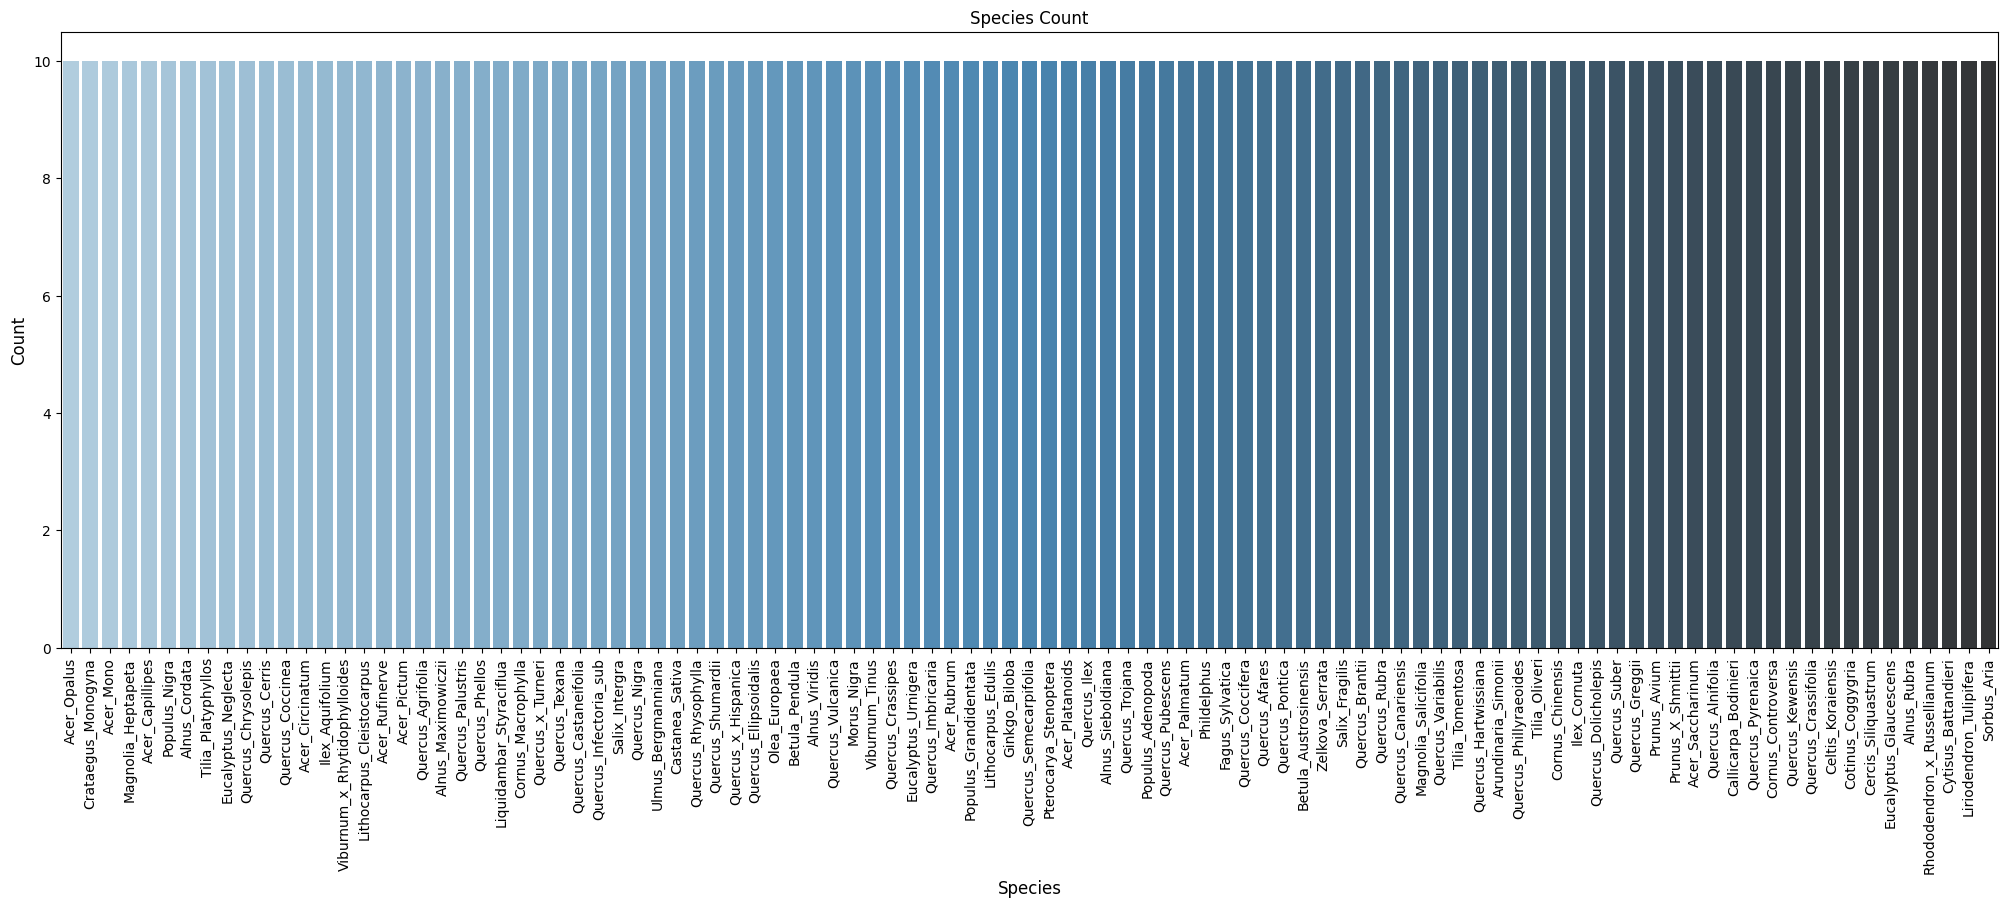

In [42]:
# Count the number of datapoints for every species
species_count = train['species'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(x = species_count.index, y = species_count.values, palette="Blues_d")
plt.title('Species Count')
plt.xticks(rotation='vertical')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.show()

<ipython-input-43-ebbe5ebe7294>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


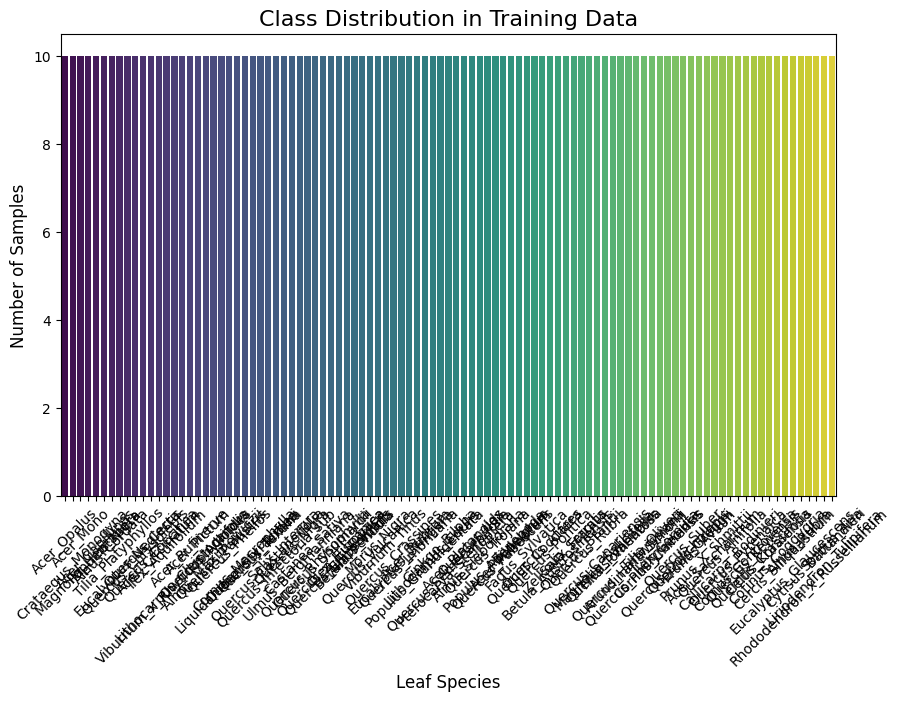

In [43]:
class_counts = train['species'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Leaf Species", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


# **Draw some of the images**

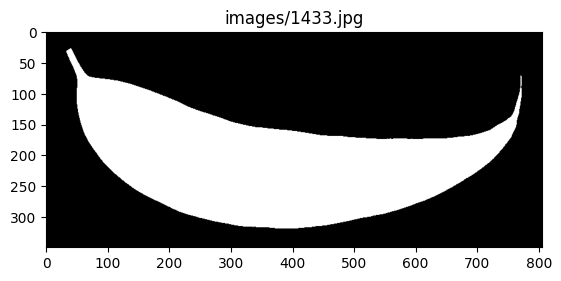

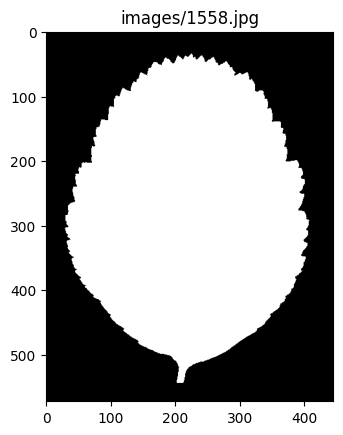

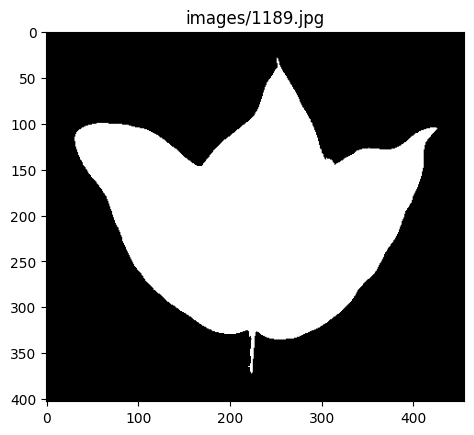

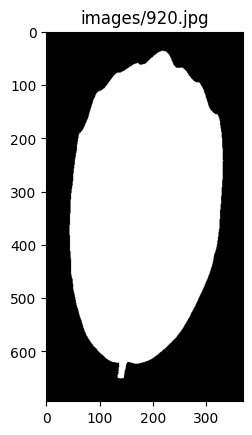

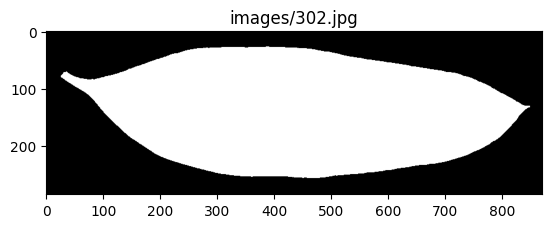

In [44]:
# Match the image filenames in the zip file with the ids in the train_df DataFrame
matched_images = [img for img in image_names if any(str(id) in img for id in train['id'])]

# Randomly pick 5 images
random.seed(4)
five_images = random.sample(matched_images, 5)

# Display the images
for img_name in five_images:
    with zipfile.ZipFile('/content/images.zip', 'r') as myzip:
        with myzip.open(img_name) as myfile:
            img = Image.open(myfile)
            plt.imshow(img, cmap='gray')
            plt.title(img_name)
            plt.show()

# **correlation analysis**

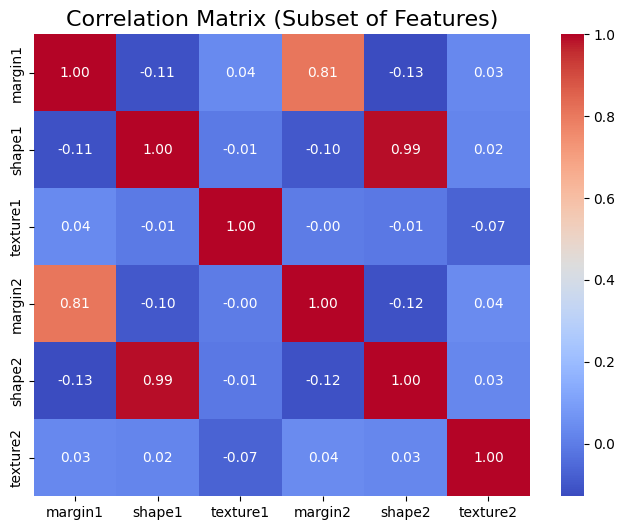

In [45]:
# Select a subset of columns for analysis
subset_features = ['margin1', 'shape1', 'texture1', 'margin2', 'shape2', 'texture2']
correlation_matrix = train[subset_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Subset of Features)", fontsize=16)
plt.show()


# **Identify Categorical Columns**

In [46]:
categorical_columns = train.select_dtypes(include=['object']).columns


In [47]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Add the 'image_path' column to train and test DataFrames
train['image_path'] = train['id'].apply(lambda x: os.path.join('/content/images', f'{x}.jpg'))  # Adjust extension if needed
test_data['image_path'] = test_data['id'].apply(lambda x: os.path.join('/content/images', f'{x}.jpg'))  # Adjust extension if needed

# Define a preprocessing function
def preprocess_images(df, target_column=None, target_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = row['image_path']
        img = load_img(img_path, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)

        # Append the label if the target column is provided
        if target_column:
            labels.append(row[target_column])
    images = np.array(images)
    labels = np.array(labels) if target_column else None
    return images, labels

# Process the training data
X_train, y_train = preprocess_images(train, target_column='species')

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Label encode the 'species' column

# One-hot encode the labels
y_train_encoded = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))

# Process the test data (no labels here)
X_test, _ = preprocess_images(test_data)

# Drop the 'image_path' column after preprocessing
train.drop(columns=['image_path'], inplace=True)
test_data.drop(columns=['image_path'], inplace=True)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train_encoded.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (990, 128, 128, 3)
y_train shape: (990, 99)
X_test shape: (594, 128, 128, 3)


# **Apply label encoding:**



**Mapping after enconding in <strong>List : mapping</strong>**  

In [48]:
from sklearn import preprocessing

# Initialize the LabelEncoder
le = preprocessing.LabelEncoder()

# Loop through each categorical column and apply label encoding
for col in categorical_columns:
    # Fit the label encoder on the column data
    le.fit(train[col])

    # Print the class labels (original values)
    print(f"Classes for {col}: {list(le.classes_)}")

    # Define a function to transform values and handle unseen labels
    def safe_transform(value):
        if value in le.classes_:
            return le.transform([value])[0]
        else:
            return -1  # Or some other value to represent unseen labels

    # Apply the safe_transform function to the column
    train[col] = train[col].apply(safe_transform)

    # Print the encoded values
    print(f"Encoded values for {col}: {train[col].tolist()}")

    # Print the mapping of encoded values to original labels
    mapping = {label: class_name for label, class_name in enumerate(le.classes_)}
    print(f"Mapping for {col}: {mapping}")


Classes for species: ['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shm

# **Save the encoded data**

In [49]:
# Save the modified DataFrame to a new CSV file
train.to_csv('encoded_train.csv', index=False)


In [50]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [51]:
# Display unique values in the 'species' column after encoding
unique_species_encoded = train['species'].unique()
print(unique_species_encoded)


[ 3 49 65 94 84 40 54 78 53 89 98 16 74 50 58 31 43  4 75 44 83 13 66 15
  6 73 22 36 27 88 12 28 21 25 20 60 69 23 76 18 52  9 48 47 64 81 62 34
 92 79 82 32 35 72 71 11 51  5  8 37 97 33  1 59 56 57 29 93 10 46  0 39
  2 24 26 87 55 38 45  7 67 30 61 96 41 85 14 17 42 63 86 80 77 19 95 70
 90 68 91]


In [52]:
# Calculate the correlation matrix
correlation_matrix = train.corr()

# Find strongly correlated features (absolute correlation above 0.8)
strongly_correlated = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Create a set to track printed pairs
printed_pairs = set()

# Print pairs of strongly correlated features (excluding self-correlations)
print("Strongly Correlated Feature Pairs (absolute correlation > 0.8):")
for col1 in strongly_correlated.columns:
    for col2 in strongly_correlated.index:
        # Skip if the two columns are the same or already printed in reverse order
        if col1 != col2 and not pd.isna(strongly_correlated.loc[col2, col1]):
            pair = tuple(sorted([col1, col2]))  # Sort to avoid duplicates like (x, y) and (y, x)
            if pair not in printed_pairs:
                print(f"{col1} - {col2} : {strongly_correlated.loc[col2, col1]}")
                printed_pairs.add(pair)


Strongly Correlated Feature Pairs (absolute correlation > 0.8):
margin1 - margin2 : 0.8063903199826975
margin2 - margin6 : 0.8257615499454323
margin2 - margin11 : 0.8050635157794789
margin2 - margin51 : 0.8108236396160801
margin5 - margin41 : 0.8055441169450918
margin5 - margin46 : 0.8269000888357672
margin12 - margin15 : 0.8068110752188559
margin15 - margin39 : 0.8520556276045248
margin27 - margin62 : 0.8293541238023813
margin31 - margin32 : 0.8488705065981728
margin31 - margin49 : 0.8103014132441697
margin32 - margin49 : 0.8745216486494891
margin40 - margin46 : 0.8113958478835102
margin46 - margin54 : 0.8100860238197416
margin52 - margin64 : 0.8014334009170132
shape1 - shape2 : 0.9881718332377013
shape1 - shape3 : 0.963959324477306
shape1 - shape4 : 0.9285011860362645
shape1 - shape5 : 0.8770428244028166
shape1 - shape6 : 0.8103373821903661
shape1 - shape29 : 0.8349132497741564
shape1 - shape30 : 0.8694434474841756
shape1 - shape31 : 0.890415098147002
shape1 - shape32 : 0.90253008822

In [53]:
# Calculate the correlation matrix
correlation_matrix = train.corr()

# Find extremely uncorrelated features (absolute correlation below 0.1)
uncorrelated = correlation_matrix[(correlation_matrix < 0.1) & (correlation_matrix > -0.1)]

# Create a set to track printed pairs
printed_pairs = set()

# Print pairs of extremely uncorrelated features
print("Extremely Uncorrelated Feature Pairs (absolute correlation < 0.1):")
for col1 in uncorrelated.columns:
    for col2 in uncorrelated.index:
        # Skip if the two columns are the same or already printed in reverse order
        if col1 != col2 and not pd.isna(uncorrelated.loc[col2, col1]):
            pair = tuple(sorted([col1, col2]))  # Sort to avoid duplicates like (x, y) and (y, x)
            if pair not in printed_pairs:
                print(f"{col1} - {col2} : {uncorrelated.loc[col2, col1]}")
                printed_pairs.add(pair)


Streaming output truncated to the last 5000 lines.
margin57 - texture27 : 0.06785331357773085
margin57 - texture28 : -0.0946409010868545
margin57 - texture29 : -0.05597757212078066
margin57 - texture30 : -0.012157252981050116
margin57 - texture31 : -0.08755200829624754
margin57 - texture33 : 0.04510253191074871
margin57 - texture34 : 0.02962584888508436
margin57 - texture35 : -0.09013080373686574
margin57 - texture37 : 0.06410563698142539
margin57 - texture38 : -0.0621580679789427
margin57 - texture41 : 0.0651172401113509
margin57 - texture43 : -0.010565107953090562
margin57 - texture44 : 0.02833446903038676
margin57 - texture45 : -0.00529486749418347
margin57 - texture46 : -0.0751869024594611
margin57 - texture49 : -0.03538399502451849
margin57 - texture50 : -0.052364836765195814
margin57 - texture51 : -0.07741437447773065
margin57 - texture53 : 0.06032259118467701
margin57 - texture54 : -0.027869726270278332
margin57 - texture55 : -0.04492561599579126
margin57 - texture56 : -0.088014

In [54]:
column_id = 'id'

column_correlation = correlation_matrix[column_id]

# Print the correlations
print(f"Correlation of {column_id} with other columns:")
print(column_correlation)

Correlation of id with other columns:
id           1.000000
species      0.071345
margin1     -0.011673
margin2     -0.027565
margin3     -0.059533
               ...   
texture60   -0.000823
texture61    0.026319
texture62    0.032873
texture63    0.024299
texture64    0.035396
Name: id, Length: 194, dtype: float64


In [55]:
column_id = 'species'

column_correlation = correlation_matrix[column_id]

# Print the correlations
print(f"Correlation of {column_id} with other columns:")
print(column_correlation)

Correlation of species with other columns:
id           0.071345
species      1.000000
margin1     -0.018265
margin2     -0.089907
margin3      0.182852
               ...   
texture60   -0.016716
texture61    0.158581
texture62    0.079675
texture63    0.194908
texture64    0.064154
Name: species, Length: 194, dtype: float64


In [56]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Your previous image preprocessing and encoding steps are assumed to be correct

# Define the model
model = Sequential([
    # First convolutional layer with Input layer instead of input_shape
    Input(shape=(128, 128, 3)),  # Defining the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output for fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer (number of classes)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)

# Training the model with validation split
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.2,  # 20% of the training data will be used for validation
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping based on validation loss
)



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0202 - loss: 4.9294 - val_accuracy: 0.0101 - val_loss: 4.5586
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 874ms/step - accuracy: 0.0450 - loss: 4.4185 - val_accuracy: 0.1667 - val_loss: 3.9378
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 949ms/step - accuracy: 0.2122 - loss: 3.4815 - val_accuracy: 0.3182 - val_loss: 3.1281
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 908ms/step - accuracy: 0.4142 - loss: 2.5124 - val_accuracy: 0.3586 - val_loss: 2.6374
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 862ms/step - accuracy: 0.5428 - loss: 1.7977 - val_accuracy: 0.4596 - val_loss: 2.2855
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 908ms/step - accuracy: 0.6342 - loss: 1.2922 - val_accuracy: 0.4798 - val_loss: 2.1844
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 819ms/step - accuracy: 0.7245 - loss: 0.9652 - val_accuracy: 0.4798 - val_loss: 2.2679
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 847ms/step - accuracy: 0.7830 - loss: 0.7769 - val_accurac

In [57]:
# Evaluating on the test data
test_predictions = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step


ID: 4 | Predicted Species: Quercus_Agrifolia | Confidence: 0.7532
ID: 7 | Predicted Species: Quercus_Brantii | Confidence: 0.9631
ID: 9 | Predicted Species: Acer_Platanoids | Confidence: 0.2661
ID: 12 | Predicted Species: Castanea_Sativa | Confidence: 0.7858
ID: 13 | Predicted Species: Populus_Nigra | Confidence: 0.9100


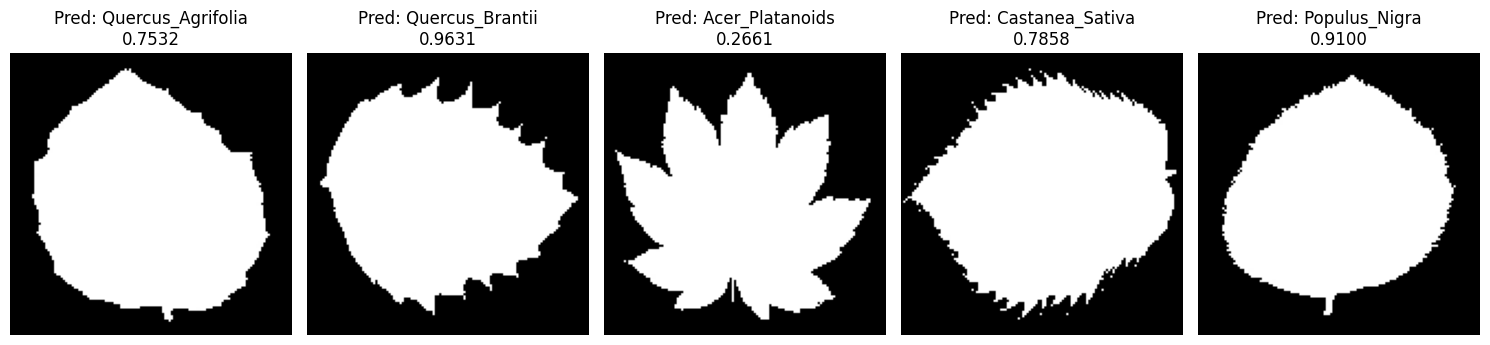

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Convert predictions from one-hot encoding to class indices
predicted_classes = np.argmax(test_predictions, axis=1)

# Map class indices back to species names using the label encoder
predicted_species = label_encoder.inverse_transform(predicted_classes)

# Add predictions to the test_data DataFrame
test_data['predicted_species'] = predicted_species
test_data['predicted_probabilities'] = np.max(test_predictions, axis=1)  # Add maximum probability for each prediction

# Create a figure to display images next to each other
fig, axes = plt.subplots(1, len(test_data.head()), figsize=(15, 5))  # Adjust size as needed

# Display images with predictions
for idx, (index, row) in enumerate(test_data.head().iterrows()):
    image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
    predicted_species = row['predicted_species']
    predicted_probability = row['predicted_probabilities']

    # Print prediction info
    print(f"ID: {row['id']} | Predicted Species: {predicted_species} | Confidence: {predicted_probability:.4f}")

    # Load the image and display it
    img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
    ax = axes[idx]  # Get the axis for this image
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes for better presentation
    ax.set_title(f"Pred: {predicted_species}\n{predicted_probability:.4f}")  # Title with species and confidence

# Show the plot with images
plt.tight_layout()  # Ensure images are displayed next to each other without overlap
plt.show()


In [59]:
# Save the model in HDF5 format
model.save('/content/first_model.h5')  # Save to '/content' directory in Colab


In [60]:
from google.colab import files
files.download('/content/first_model.h5')  # Download the model file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>